In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def pagerank_algo(graph, damping_factor = 0.85, tolerance = 1e-6, max_iter = 100):
    nodes = list(graph.keys())
    
    N = len(nodes)
    rank = np.ones(N) / N
    M = np.zeros((N, N))
    
    for i, node in enumerate(nodes):
        if graph[node]:
            for link in graph[node]:
                j = nodes.index(link)
                M[j, i] = 1 / len(graph[node])
                
    convergence = []
    for _ in range(max_iter):
        new_rank = damping_factor * M @ rank + (1-damping_factor) / N
        diff = np.linalg.norm(new_rank - rank, 1)
        convergence.append(diff)
        
        if diff < tolerance:
            break
        rank = new_rank
        
    return {nodes[i] : rank[i] for i in range(N)}, convergence

In [17]:
graph = {
    1 : [2],
    2 : [3, 5],
    3 : [1],
    4 : [2],
    5 : [3, 4]
}
page_rank, convergence = pagerank_algo(graph)

In [18]:
for node, score in sorted(page_rank.items()):
    print(f"Node {node}: {score:.6f}")

Node 1: 0.220838
Node 2: 0.300129
Node 3: 0.224516
Node 4: 0.096961
Node 5: 0.157555


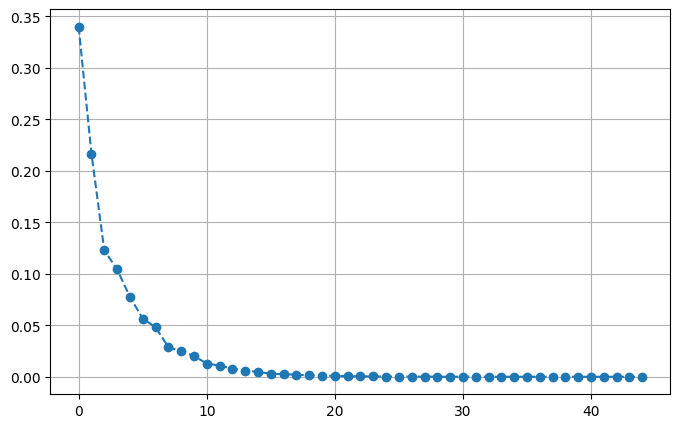

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(convergence, marker = "o", linestyle = "--")
plt.grid(True)
plt.show()
